In [1]:
import numpy as np
import matplotlib.pyplot as plt

from poles_roots._utils import compute_incenter, convert_cart_to_complex
from poles_roots.integration import argument_principle_from_points

In [2]:
tri_points = np.array([[0, 0], [1, 0], [0, 1]])
center = compute_incenter(*tri_points)

x_points = np.logspace(0, np.log2(center[0]+1), base=2, num=20) - 1
locations_cart = np.stack([x_points, center[1]*np.ones_like(x_points)]).T

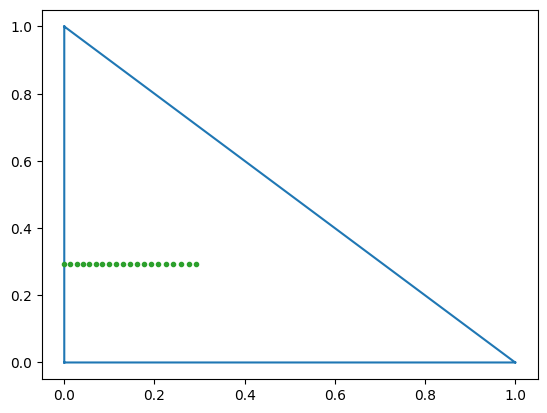

In [3]:
fig, ax = plt.subplots()
ax.triplot(*tri_points.T)
ax.plot(*locations_cart.T, '.')

In [12]:
locations = convert_cart_to_complex(locations_cart)
points = convert_cart_to_complex(tri_points)
errors = []
for location in locations:
    def f(z):
        return 1/(z-location)
    
    def f_prime(z):
        return -1/(z-location)**2
    
    res = argument_principle_from_points(f, f_prime, points=points)[0]
    errors.append(np.abs(-1 - res))
    

/home/jakeb/development/poles-and-roots/venv/lib/python3.12/site-packages/scipy/integrate/_quadpack_py.py:446: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  re_retval = quad(refunc, a, b, args, full_output, epsabs,


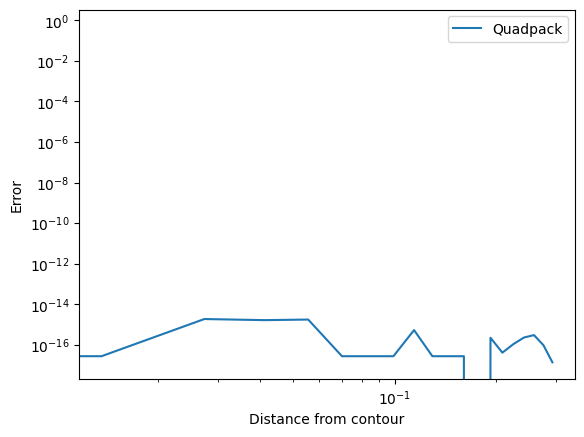

In [19]:
fig, ax = plt.subplots()
ax.loglog(locations.real, errors, label="Quadpack")
ax.set_ylabel("Error")
ax.set_xlabel("Distance from contour")
ax.legend()